In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Notes for general cyclical training

Based on *General Cyclical Training of Neural Networks* ([Leslie, 2022](https://arxiv.org/pdf/2202.08835.pdf))

**General cyclical learning** (linear) is defined by

$$\Large \xi P_i + (1 - \xi) P_m$$

where:

* $P_j$ is a set of parameters, $P_j = {(P_j) : j \in (0, 1, \dots, n)}$, such that $P_0$ makes it easy to learn for the network while $P_n$ makes it difficult

* $\xi$ is defined as follows:

$$\large \xi =     \begin{cases}
      1 - f_c \frac{e_k}{e_n} & \text{if} f_c \times e_k \leq e_n\\
      (f_c \frac{e_k}{e_n} - 1) / (f_c - 1) & \text{otherwise}\\
    \end{cases} 
$$

where:

* $e_k$ is the current epoch
* $e_n$ is the total number of epochs
* $f_c$ is a cyclical factor

In [14]:
# Cyclical pattern
def cyclical_pattern(cyclical_factor, n_epochs):
    
    """Takes initial parameter value, cyclical factor `f_c` and number of epochs and returns a cyclical pattern"""
    
    cond_1 = lambda f_c, e_k, e_n: 1 - f_c * (e_k / e_n)
    cond_2 = lambda f_c, e_k, e_n: (f_c * (e_k / e_n) - 1) / (f_c - 1)
    
    pattern = []
    
    for epoch in range(n_epochs):
        if cyclical_factor * epoch <= n_epochs:
            pattern.append(cond_1(cyclical_factor, epoch, n_epochs))
        else:
            pattern.append(cond_2(cyclical_factor, epoch, n_epochs))
            
    return pattern
        

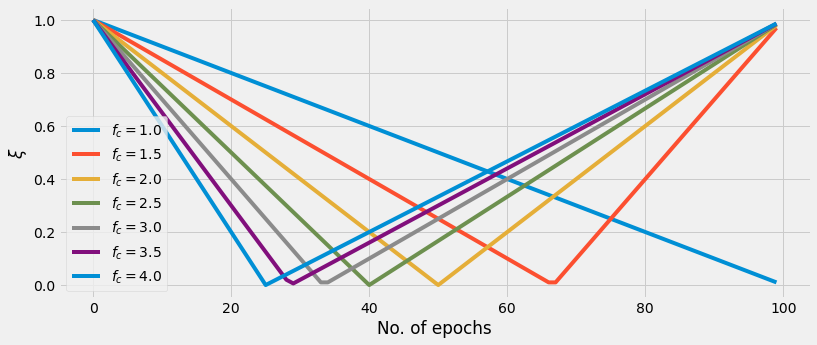

In [27]:
# Sweep over differnet values of cyclical factor and plot 
fcs = np.arange(1, 4.5, .5)

# Init fig
plt.figure(figsize=(12, 5))

# Iterate
for f_c in fcs:
    pattern = cyclical_pattern(f_c, 100)
    plt.plot(pattern, label=f'$f_c = {f_c}$')

plt.legend()
plt.xlabel('No. of epochs')
plt.ylabel('$\\xi$')
plt.show()